# ASSESSMENT 3 - Critical Analysis and Visualisation of BRFSS Health Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




TASK 1

<ipython-input-4-512cdd607618>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_group', y='weight', palette='pastel')
<ipython-input-4-512cdd607618>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_group', y='height', palette='Set2')


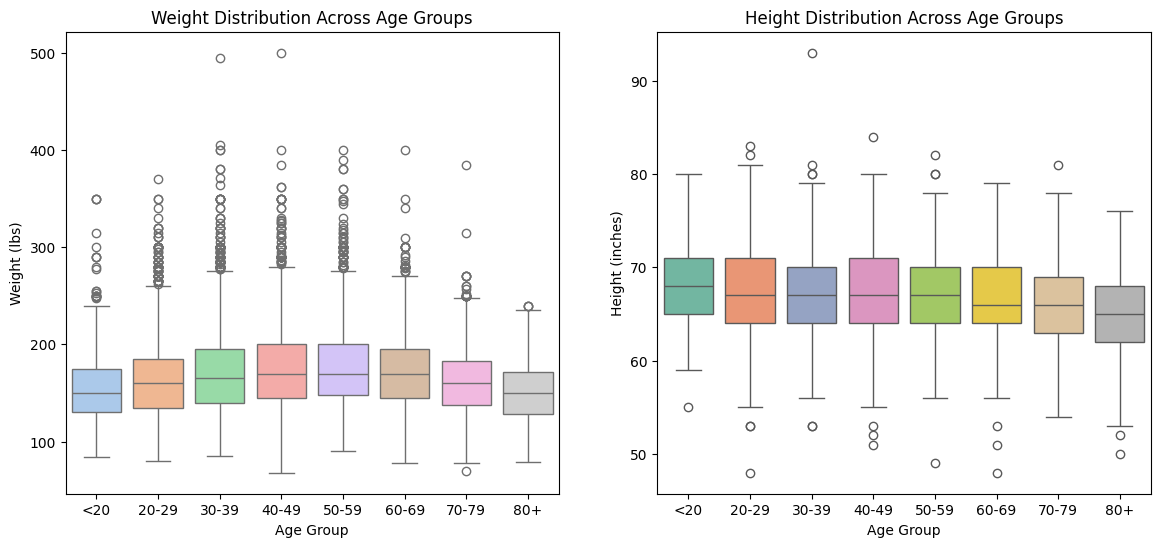

In [4]:
df = pd.read_csv('cdc-2.csv')

## Making up bins to group my data according to age groups
bins = [0, 19, 29, 39, 49, 59, 69, 79, np.inf]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)


## A visualization to show the distribution of weights and heights across the age groups
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='age_group', y='weight', palette='pastel')
plt.title('Weight Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Weight (lbs)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='age_group', y='height', palette='Set2')
plt.title('Height Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Height (inches)')


plt.show()


TASK 2

<ipython-input-5-c82a7c8886ed>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df.groupby(['gender', 'age_group'])[['weight', 'height']].mean().round(1)
<ipython-input-5-c82a7c8886ed>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_weight = df.pivot_table(values='weight', index='age_group', columns='gender', aggfunc='mean')
<ipython-input-5-c82a7c8886ed>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_height = df.pivot_table(values='height', index

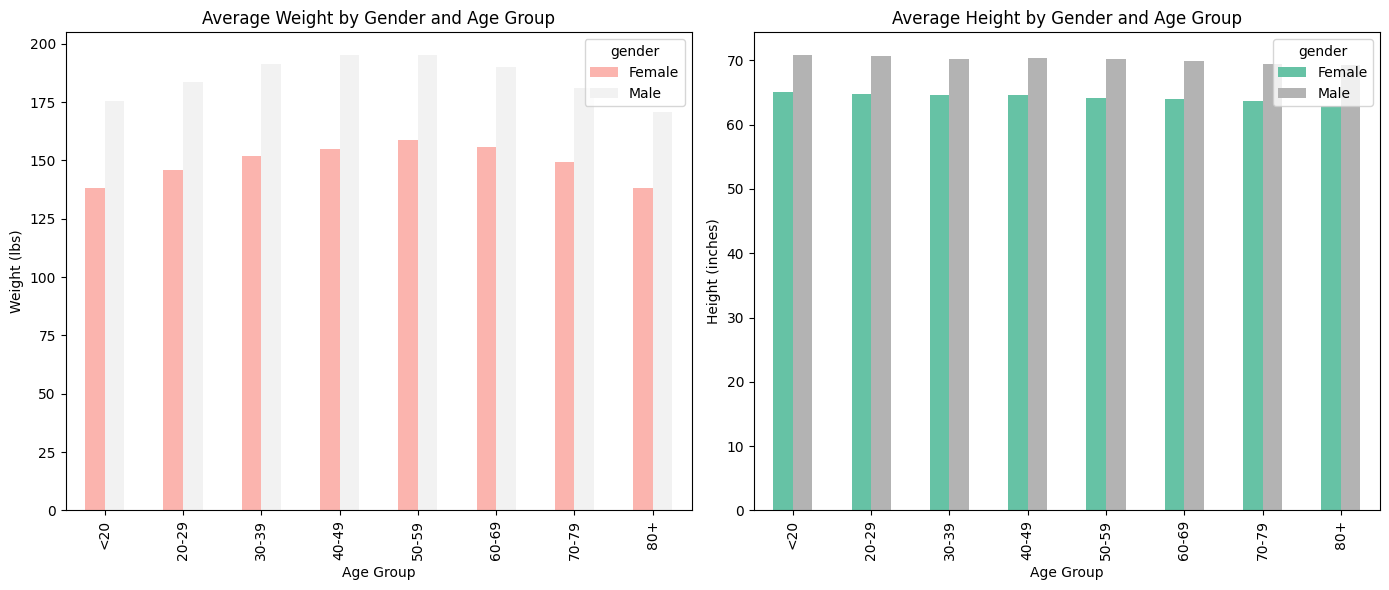

gender,Female,Male
age_group,,
<20,137.979239,175.250000
20-29,145.737487,183.613260
30-39,152.014227,191.314505
40-49,154.690419,195.059489
50-59,158.635003,195.095506
60-69,155.685892,190.127049
70-79,149.483971,180.919540
80+,138.365333,170.907950


In [5]:
## Data Cleaning to remove entries with weight or height < 50 and convert the gender labels to readable labels like male and female

df = df[(df['height'] >= 50) & (df['weight'] >= 50)].copy()
df['gender'] = df['gender'].map({'m': 'Male', 'f': 'Female'})


## hierarchical indexing grouping data first by gender and then by age_group and calculate the mean weight and height of the indexed group

group_stats = df.groupby(['gender', 'age_group'])[['weight', 'height']].mean().round(1)

## Creation of pivot tables for visualization
pivot_table_weight = df.pivot_table(values='weight', index='age_group', columns='gender', aggfunc='mean')
pivot_table_height = df.pivot_table(values='height', index='age_group', columns='gender', aggfunc='mean')


## Visualization to show the average weight and height by age group and gender
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
pivot_table_weight.plot(kind='bar', ax=axes[0], colormap='Pastel1')
axes[0].set_title('Average Weight by Gender and Age Group')
axes[0].set_ylabel('Weight (lbs)')
axes[0].set_xlabel('Age Group')

pivot_table_height.plot(kind='bar', ax=axes[1], colormap='Set2')
axes[1].set_title('Average Height by Gender and Age Group')
axes[1].set_ylabel('Height (inches)')
axes[1].set_xlabel('Age Group')
plt.tight_layout()
plt.show()




TASK 3

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df['BMI'] = (df['weight'] / (df['height'] ** 2)) * 703

def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Healthy'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_category'] = df['BMI'].apply(bmi_category)

X = df[['height', 'weight']]
y = df['BMI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", dict(zip(X.columns, model.coef_)))


R² Score: 0.9831752153926925
MSE: 0.43720700438564486
Coefficients: {'height': -0.7974848837860372, 'weight': 0.15539031295721883}


<ipython-input-7-31a60632e60c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='BMI_category', palette='Set2', order=['Underweight', 'Healthy', 'Overweight', 'Obese'])


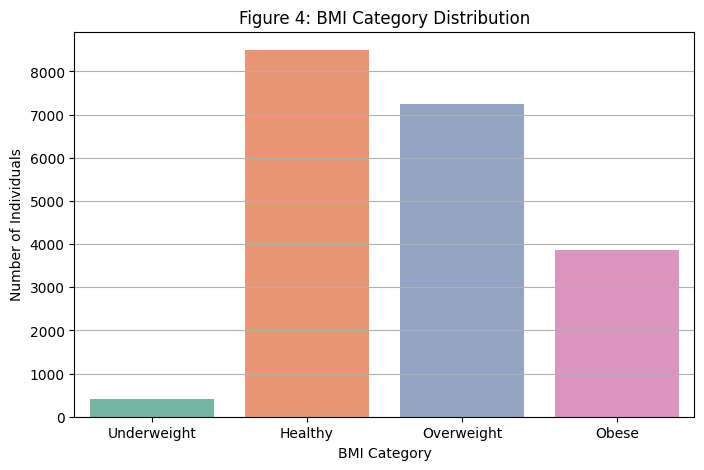

R² Score: 0.9832
Mean Squared Error: 0.44
Model Coefficients: {'height': np.float64(-0.7974848837860372), 'weight': np.float64(0.15539031295721883)}


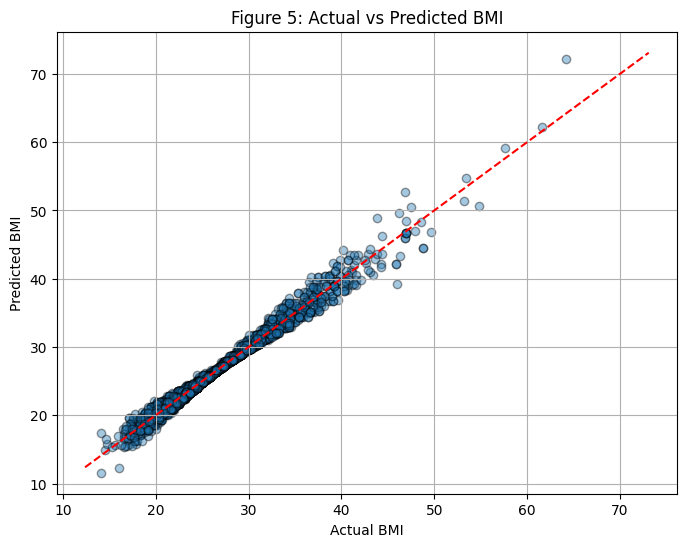

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Filter biologically plausible records
df_clean = df[(df['height'] >= 50) & (df['weight'] >= 50)].copy()

# Calculate BMI
df_clean['BMI'] = (df_clean['weight'] / (df_clean['height'] ** 2)) * 703

# Categorize BMI
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Healthy'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_clean['BMI_category'] = df_clean['BMI'].apply(bmi_category)

# ===== Figure 4: BMI Category Distribution =====
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='BMI_category', palette='Set2', order=['Underweight', 'Healthy', 'Overweight', 'Obese'])
plt.title('Figure 4: BMI Category Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Number of Individuals')
plt.grid(axis='y')
plt.show()

# ===== Predictive Modeling: Linear Regression =====
X = df_clean[['height', 'weight']]
y = df_clean['BMI']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Model Coefficients: {dict(zip(X.columns, model.coef_))}")

# ===== Figure 5: Model Evaluation Output =====
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Figure 5: Actual vs Predicted BMI')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.grid(True)
plt.show()
